# Problema de la mochila

## Análisis de tiempos

In [26]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor

from functools import partial

from knapsack_file_parser import Parser
from knapsack import knapsack_bottom_up, knapsack_top_down

In [27]:
def plot_algorithms(problems, title='', savefig=False):

    x, td_y, bu_y = [], [], []
    td_times, bu_times = [], []
    weight = 0

    for problem in problems:

        if problem.id < 1000:
            td_timer = timeit.Timer(partial(knapsack_top_down, problem.values, problem.weights, problem.knapsack_weight))
            td_times.append(td_timer.timeit(1))
            bu_timer = timeit.Timer(partial(knapsack_bottom_up, problem.values, problem.weights, problem.knapsack_weight))
            bu_times.append(bu_timer.timeit(1))

            td_t = np.mean(td_times)
            bu_t = np.mean(bu_times)

            td_y.append(td_t)
            bu_y.append(bu_t)

            x.append(problem.knapsack_weight)
            weight = problem.knapsack_weight

    plt.plot(x, td_y, label = 'Top-Down Solution')
    plt.plot(x, bu_y, label = 'Bottom-Up Solution')

    plt.title(title)
    plt.ylabel('Tiempo de ejecución')
    plt.xlabel('Peso de la mochila')
    plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: n_cantItems_maxWeight_123123.png
        filename = '_'.join(["n", str(len(problems[0].values)), 'maxWeight', str(weight)])
        plt.savefig('images/' + filename + '.png', bbox_inches='tight')
    plt.show()

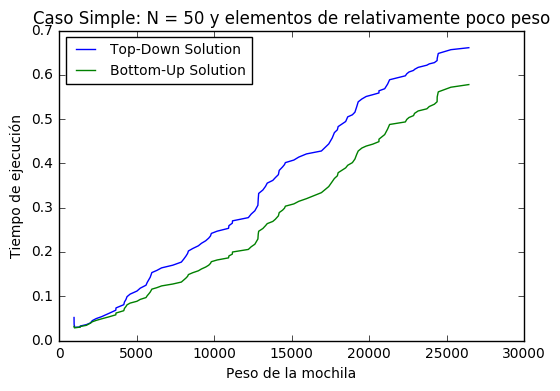

In [28]:
problems = Parser.parse_file('test_files/small_coef/knapPI_1_50_1000.csv')
list.sort(problems)
title = 'Caso Simple: N = 50 y elementos de relativamente poco peso'
plot_algorithms(problems, title = title, savefig = True)

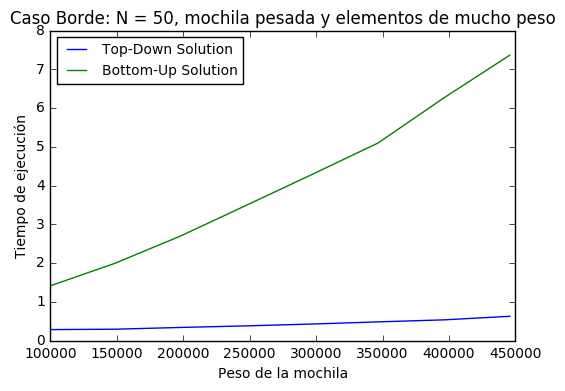

In [22]:
problems = Parser.parse_file('test_files/small_coef/knapPI_9_50_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 50, mochila pesada y elementos de mucho peso'
plot_algorithms(problems, title = title, savefig = True)